In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('BBDD-T2-15.csv')

In [3]:
df.head()

,Día,Campaña,Dispositivo,Mes,Día de la semana,Región,Impresiones,Clics,Coste,CTR,Posic. media,CPC medio,CPM medio,Coste medio,Conversiones,Coste/conv.,Porcentaje de conv.,Valor conv./coste,Valor conv. total,Valor/conv.
0,02-abr-2015,P - Batman,Ordenadores,Abr. 2015,Jueves,Islas Baleares,1.0,1,"0,14 €","100,00 %","1,00","0,14 €","140,00 €","0,14 €","0,00","0,00 €","0,00 %","0,00","0,00","0,00"
1,03-abr-2015,M - Smart Trike,Ordenadores,Abr. 2015,Viernes,Castilla-La Mancha,5.0,0,"0,00 €","0,00 %","3,20","0,00 €","0,00 €","0,00 €","0,00","0,00 €","0,00 %","0,00","0,00","0,00"
2,03-abr-2015,P - Batman,Tablets,Abr. 2015,Viernes,Cataluña,3.0,0,"0,00 €","0,00 %","2,33","0,00 €","0,00 €","0,00 €","0,00","0,00 €","0,00 %","0,00","0,00","0,00"
3,05-abr-2015,M - Megabloks,Ordenadores,Abr. 2015,Domingo,País Vasco,2.0,0,"0,00 €","0,00 %","2,50","0,00 €","0,00 €","0,00 €","0,00","0,00 €","0,00 %","0,00","0,00","0,00"
4,04-abr-2015,C - Aire Libre,Tablets,Abr. 2015,Sábado,Castilla y León,95.0,2,"0,57 €","2,11 %","2,54","0,28 €","6,00 €","0,28 €","0,00","0,00 €","0,00 %","0,00","0,00","0,00"


In [4]:
df.dtypes

Día                     object
Campaña                 object
Dispositivo             object
Mes                     object
Día de la semana        object
Región                  object
Impresiones            float64
Clics                    int64
Coste                   object
CTR                     object
Posic. media            object
CPC medio               object
CPM medio               object
Coste medio             object
Conversiones            object
Coste/conv.             object
Porcentaje de conv.     object
Valor conv./coste       object
Valor conv. total       object
Valor/conv.             object
dtype: object

In [5]:
df.describe()

,Impresiones,Clics
count,180860.000000,180860.000000
mean,29.350102,1.479166
std,88.798989,9.452198
min,0.000000,0.000000
25%,2.000000,0.000000
50%,4.000000,0.000000
75%,16.000000,1.000000
max,999.000000,496.000000


In [6]:
df.tail()

,Día,Campaña,Dispositivo,Mes,Día de la semana,Región,Impresiones,Clics,Coste,CTR,Posic. media,CPC medio,CPM medio,Coste medio,Conversiones,Coste/conv.,Porcentaje de conv.,Valor conv./coste,Valor conv. total,Valor/conv.
180855,30-jun-2015,P - Barbie,Móviles,Jun. 2015,Martes,Comunidad de Madrid,3.000,1,"0,08 €","33,33 %","1,67","0,08 €","26,67 €","0,08 €","0,00","0,00 €","0,00 %","0,00","0,00","0,00"
180856,30-jun-2015,P - Toy Story,Móviles,Jun. 2015,Martes,Comunidad Valenciana,19.000,2,"0,11 €","10,53 %","1,68","0,06 €","5,79 €","0,06 €","0,00","0,00 €","0,00 %","0,00","0,00","0,00"
180857,30-jun-2015,P - Toy Story,Tablets,Jun. 2015,Martes,Castilla-La Mancha,6.000,2,"0,47 €","33,33 %","2,00","0,24 €","78,33 €","0,24 €","0,00","0,00 €","0,00 %","0,00","0,00","0,00"
180858,30-jun-2015,M - Playmobil,Tablets,Jun. 2015,Martes,Castilla-La Mancha,27.000,0,"0,00 €","0,00 %","1,70","0,00 €","0,00 €","0,00 €","0,00","0,00 €","0,00 %","0,00","0,00","0,00"
180859,30-jun-2015,Shopping - General,Tablets,Jun. 2015,Martes,Comunidad Valenciana,1.144,20,"3,76 €","1,75 %","0,00","0,19 €","3,29 €","0,19 €","0,00","0,00 €","0,00 %","0,00","0,00","0,00"


In [7]:
# Nos enfrentamos a varios problemas con el formato de las columnas
# 1. Columnas como el Coste, CPC medio, Coste medio... no tienen formato numérico (aunque algunas no nos servirán)
# 2. La columna 'Día' no tiene formato de fecha
# 3. La columna 'Impresiones' no ha leido correctamente los números (En este notebook aporto una posible solución, no la definitva)

In [9]:
df['Coste'][0]

'0,14\xc2\xa0\xe2\x82\xac'

In [10]:
# Creamos una función para eliminar \xc2\xa0\xe2\x82\xac y que también reemplace la coma por el punto.
# De esta manera obtendremos un valor numérico. 
def mod(a):
   return float(str(a).split('\xc2\xa0\xe2\x82\xac')[0].replace(',','.'))

df['Coste'] = df['Coste'].apply(mod)
df['CPC medio'] = df['Coste'].apply(mod)
df['CPM medio'] = df['Coste'].apply(mod)
df['Coste medio'] = df['Coste'].apply(mod)
df['Coste/conv.'] = df['Coste/conv.'].apply(mod)

In [11]:
df.head()

,Día,Campaña,Dispositivo,Mes,Día de la semana,Región,Impresiones,Clics,Coste,CTR,Posic. media,CPC medio,CPM medio,Coste medio,Conversiones,Coste/conv.,Porcentaje de conv.,Valor conv./coste,Valor conv. total,Valor/conv.
0,02-abr-2015,P - Batman,Ordenadores,Abr. 2015,Jueves,Islas Baleares,1.0,1,0.14,"100,00 %","1,00",0.14,0.14,0.14,"0,00",0.0,"0,00 %","0,00","0,00","0,00"
1,03-abr-2015,M - Smart Trike,Ordenadores,Abr. 2015,Viernes,Castilla-La Mancha,5.0,0,0.00,"0,00 %","3,20",0.00,0.00,0.00,"0,00",0.0,"0,00 %","0,00","0,00","0,00"
2,03-abr-2015,P - Batman,Tablets,Abr. 2015,Viernes,Cataluña,3.0,0,0.00,"0,00 %","2,33",0.00,0.00,0.00,"0,00",0.0,"0,00 %","0,00","0,00","0,00"
3,05-abr-2015,M - Megabloks,Ordenadores,Abr. 2015,Domingo,País Vasco,2.0,0,0.00,"0,00 %","2,50",0.00,0.00,0.00,"0,00",0.0,"0,00 %","0,00","0,00","0,00"
4,04-abr-2015,C - Aire Libre,Tablets,Abr. 2015,Sábado,Castilla y León,95.0,2,0.57,"2,11 %","2,54",0.57,0.57,0.57,"0,00",0.0,"0,00 %","0,00","0,00","0,00"


In [12]:
def mod2(c):
   return float(str(c).replace(',','.'))
df['Conversiones'] = df['Conversiones'].apply(mod2)

In [13]:
df.describe()

,Impresiones,Clics,Coste,CPC medio,CPM medio,Coste medio,Conversiones,Coste/conv.
count,180860.000000,180860.000000,180860.000000,180860.000000,180860.000000,180860.000000,180860.000000,180860.000000
mean,29.350102,1.479166,0.313807,0.313807,0.313807,0.313807,0.019756,0.082201
std,88.798989,9.452198,2.280932,2.280932,2.280932,2.280932,0.269034,1.183475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.000000,1.000000,0.020000,0.020000,0.020000,0.020000,0.000000,0.000000
max,999.000000,496.000000,123.330000,123.330000,123.330000,123.330000,44.000000,69.330000


In [14]:
# Tratamos de solucionar el problema de codificación de la variable impresiones
def my_fun(b):
    if float((str(b).split('.')[1])) == 0.000 :
        return float(str(b).split('.')[0])+float(str(b).split('.')[1])
    else:
        return float(str(b).replace('.',''))
df['Impresiones'] = df['Impresiones'].apply(my_fun)

In [15]:
df.describe()

,Impresiones,Clics,Coste,CPC medio,CPM medio,Coste medio,Conversiones,Coste/conv.
count,180860.000000,180860.000000,180860.000000,180860.000000,180860.000000,180860.000000,180860.000000,180860.000000
mean,50.555966,1.479166,0.313807,0.313807,0.313807,0.313807,0.019756,0.082201
std,302.402541,9.452198,2.280932,2.280932,2.280932,2.280932,0.269034,1.183475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,1.000000,0.020000,0.020000,0.020000,0.020000,0.000000,0.000000
max,17959.000000,496.000000,123.330000,123.330000,123.330000,123.330000,44.000000,69.330000


In [16]:
df.dtypes

Día                     object
Campaña                 object
Dispositivo             object
Mes                     object
Día de la semana        object
Región                  object
Impresiones            float64
Clics                    int64
Coste                  float64
CTR                     object
Posic. media            object
CPC medio              float64
CPM medio              float64
Coste medio            float64
Conversiones           float64
Coste/conv.            float64
Porcentaje de conv.     object
Valor conv./coste       object
Valor conv. total       object
Valor/conv.             object
dtype: object

In [17]:
# Vamos a transformar la columna Día para conseguir tenerla en formato fecha
df['Día']=df['Día'].str.replace('-ene-','/01/')
df['Día']=df['Día'].str.replace('-feb-','/02/')
df['Día']=df['Día'].str.replace('-mar-','/03/')
df['Día']=df['Día'].str.replace('-abr-','/04/')
df['Día']=df['Día'].str.replace('-may-','/05/')
df['Día']=df['Día'].str.replace('-jun-','/06/')
df['Día']=df['Día'].str.replace('-jul-','/07/')
df['Día']=df['Día'].str.replace('-ago-','/08/')
df['Día']=df['Día'].str.replace('-sep-','/09/')
df['Día']=df['Día'].str.replace('-oct-','/10/')
df['Día']=df['Día'].str.replace('-nov-','/11/')
df['Día']=df['Día'].str.replace('-dic-','/12/')
df['Día'].head()

0    02/04/2015
1    03/04/2015
2    03/04/2015
3    05/04/2015
4    04/04/2015
Name: Día, dtype: object

In [18]:
from datetime import datetime
def fec(f):
   return datetime.strptime(f, '%d/%m/%Y')

df['Día'] = df['Día'].apply(fec)

In [19]:
df.head()

,Día,Campaña,Dispositivo,Mes,Día de la semana,Región,Impresiones,Clics,Coste,CTR,Posic. media,CPC medio,CPM medio,Coste medio,Conversiones,Coste/conv.,Porcentaje de conv.,Valor conv./coste,Valor conv. total,Valor/conv.
0,2015-04-02,P - Batman,Ordenadores,Abr. 2015,Jueves,Islas Baleares,1.0,1,0.14,"100,00 %","1,00",0.14,0.14,0.14,0.0,0.0,"0,00 %","0,00","0,00","0,00"
1,2015-04-03,M - Smart Trike,Ordenadores,Abr. 2015,Viernes,Castilla-La Mancha,5.0,0,0.00,"0,00 %","3,20",0.00,0.00,0.00,0.0,0.0,"0,00 %","0,00","0,00","0,00"
2,2015-04-03,P - Batman,Tablets,Abr. 2015,Viernes,Cataluña,3.0,0,0.00,"0,00 %","2,33",0.00,0.00,0.00,0.0,0.0,"0,00 %","0,00","0,00","0,00"
3,2015-04-05,M - Megabloks,Ordenadores,Abr. 2015,Domingo,País Vasco,2.0,0,0.00,"0,00 %","2,50",0.00,0.00,0.00,0.0,0.0,"0,00 %","0,00","0,00","0,00"
4,2015-04-04,C - Aire Libre,Tablets,Abr. 2015,Sábado,Castilla y León,95.0,2,0.57,"2,11 %","2,54",0.57,0.57,0.57,0.0,0.0,"0,00 %","0,00","0,00","0,00"


In [20]:
df.dtypes

Día                    datetime64[ns]
Campaña                        object
Dispositivo                    object
Mes                            object
Día de la semana               object
Región                         object
Impresiones                   float64
Clics                           int64
Coste                         float64
CTR                            object
Posic. media                   object
CPC medio                     float64
CPM medio                     float64
Coste medio                   float64
Conversiones                  float64
Coste/conv.                   float64
Porcentaje de conv.            object
Valor conv./coste              object
Valor conv. total              object
Valor/conv.                    object
dtype: object

In [21]:
# Eliminamos columnas que no son necesarias
df = df.drop(['CTR', 'CPC medio','CPM medio', 'Coste medio', 'Coste/conv.', 'Porcentaje de conv.', 'Valor conv./coste'
              , 'Valor conv. total', 'Valor/conv.'], axis = 1)

In [22]:
df.head()

,Día,Campaña,Dispositivo,Mes,Día de la semana,Región,Impresiones,Clics,Coste,Posic. media,Conversiones
0,2015-04-02,P - Batman,Ordenadores,Abr. 2015,Jueves,Islas Baleares,1.0,1,0.14,"1,00",0.0
1,2015-04-03,M - Smart Trike,Ordenadores,Abr. 2015,Viernes,Castilla-La Mancha,5.0,0,0.00,"3,20",0.0
2,2015-04-03,P - Batman,Tablets,Abr. 2015,Viernes,Cataluña,3.0,0,0.00,"2,33",0.0
3,2015-04-05,M - Megabloks,Ordenadores,Abr. 2015,Domingo,País Vasco,2.0,0,0.00,"2,50",0.0
4,2015-04-04,C - Aire Libre,Tablets,Abr. 2015,Sábado,Castilla y León,95.0,2,0.57,"2,54",0.0


In [23]:
# Agrupamos los valores por fecha sumando las columnas numéricas, el resto de columnas no nos interesan para esta primera prueba.
df = df.groupby('Día').sum()

In [24]:
df.head()

,Impresiones,Clics,Coste,Conversiones
Día,,,,
2015-04-01,74933.0,1716,308.65,7.0
2015-04-02,66041.0,1495,286.90,7.0
2015-04-03,68921.0,1604,308.70,13.0
2015-04-04,75845.0,1758,360.40,16.0
2015-04-05,92616.0,2219,422.72,13.0


In [25]:
# Calculamos el porcentaje de variación de conversiones diarias
variacion_diaria = df['Conversiones'] / df['Conversiones'].shift(1) - 1
df['var_diaria'] = variacion_diaria

In [26]:
# De la misma forma calculamos el porcentaje de variación de conversiones semanales
variacion_semanal = df['Conversiones'] / df['Conversiones'].shift(7) - 1
df['var_semanal'] = variacion_semanal

In [27]:
df.head(10)

,Impresiones,Clics,Coste,Conversiones,var_diaria,var_semanal
Día,,,,,,
2015-04-01,74933.0,1716,308.65,7.0,NaN,NaN
2015-04-02,66041.0,1495,286.90,7.0,0.000000,NaN
2015-04-03,68921.0,1604,308.70,13.0,0.857143,NaN
2015-04-04,75845.0,1758,360.40,16.0,0.230769,NaN
2015-04-05,92616.0,2219,422.72,13.0,-0.187500,NaN
2015-04-06,115249.0,2744,518.44,12.0,-0.076923,NaN
2015-04-07,105567.0,2494,479.88,11.0,-0.083333,NaN
2015-04-08,104854.0,2606,450.50,24.0,1.181818,2.428571
2015-04-09,106119.0,2471,444.87,16.0,-0.333333,1.285714


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

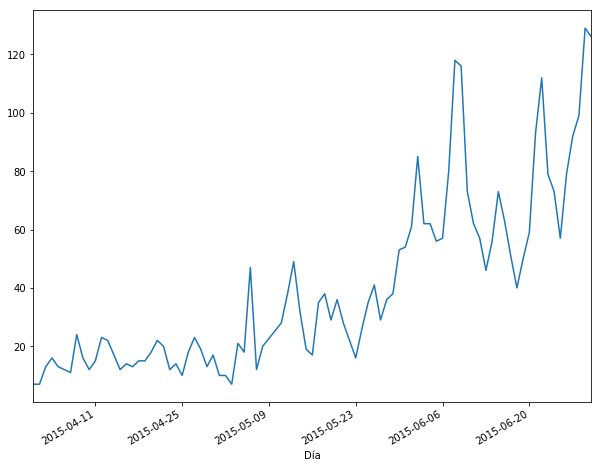

In [29]:
# graficamos Conversiones
df['Conversiones'].plot(figsize=(10, 8))

In [30]:
import statsmodels.api as sm

C:\Users\Angel\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [31]:
# Aplicando el filtro Hodrick-Prescott para separar en tendencia y 
# componente ciclico.
df_ciclo, df_tend = sm.tsa.filters.hpfilter(df['Conversiones'])
df['tend'] = df_tend

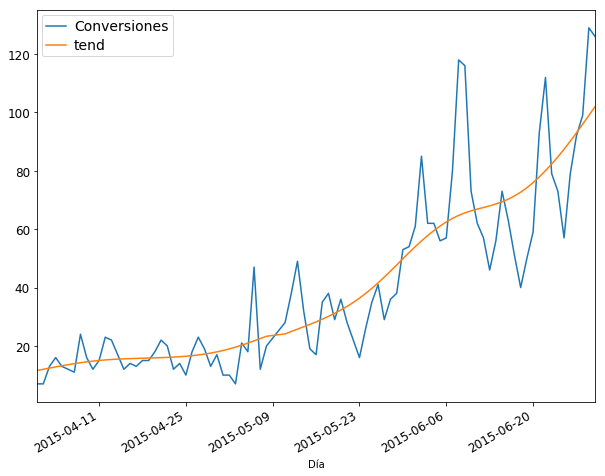

In [32]:
# graficando la variacion las conversiones con la tendencia.
df[['Conversiones', 'tend']].plot(figsize=(10, 8), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);

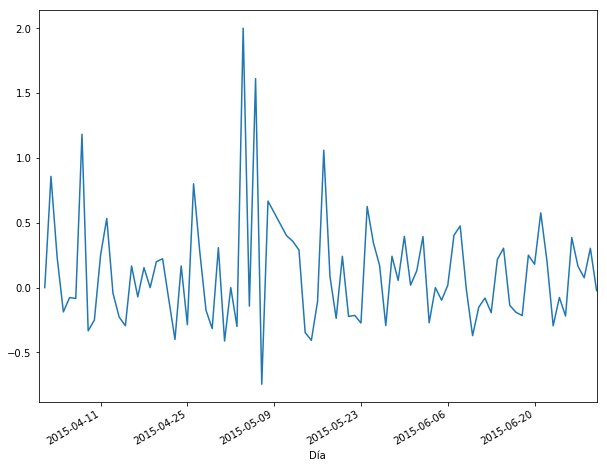

In [33]:
# graficamos la variación diario
plot = df['var_diaria'].plot(figsize=(10, 8))

C:\Users\Angel\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  


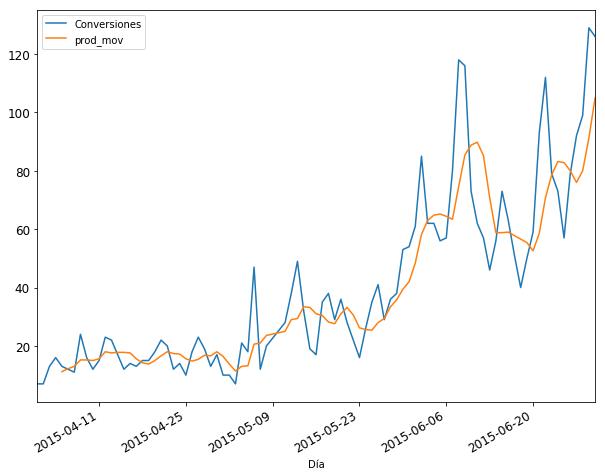

In [34]:
# Calculando promedios móviles cada 5 días
df_ma = pd.rolling_mean(df['Conversiones'], 5)
df['prod_mov'] = df_ma
plot = df[['Conversiones', 'prod_mov']].plot(figsize=(10, 8), fontsize=12)

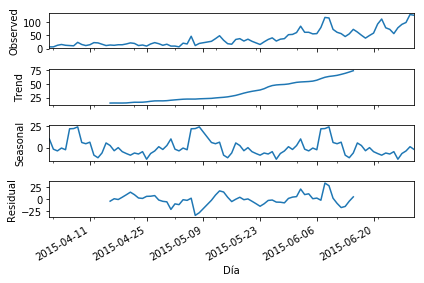

In [35]:
# Descomposición de serie de tiempo
descomposicion = sm.tsa.seasonal_decompose(df['Conversiones'],
                                                  model='additive', freq=30)  
fig = descomposicion.plot()

### Pronosticando la serie con ARIMA

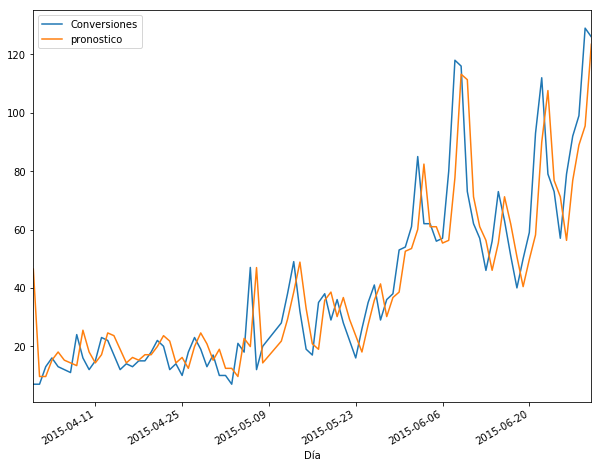

In [36]:
# Modelo ARIMA sobre el valor de cierre de la acción.
modelo = sm.tsa.ARIMA(df['Conversiones'], order=(1, 0, 0))  
resultados = modelo.fit(disp=-1)  
df['pronostico'] = resultados.fittedvalues  
plot = df[['Conversiones', 'pronostico']].plot(figsize=(10, 8))

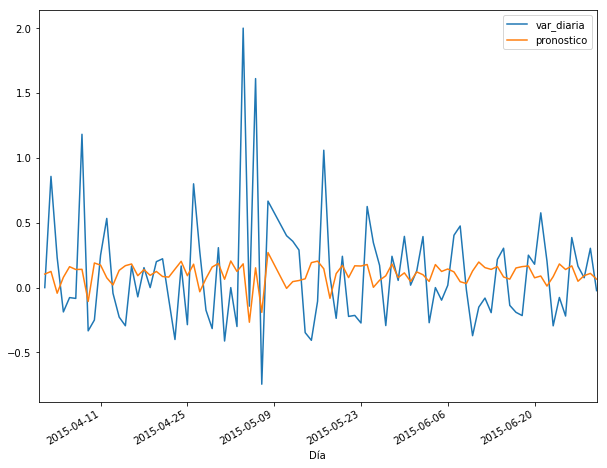

In [37]:
# modelo ARIMA sobre variación diaria
modelo = sm.tsa.ARIMA(df['var_diaria'].iloc[1:], order=(1, 0, 0))  
resultados = modelo.fit(disp=-1)  
df['pronostico'] = resultados.fittedvalues  
plot = df[['var_diaria', 'pronostico']].plot(figsize=(10, 8)) 